## Avocado Price Forecaster 

In this project, we will build a predictive model to estimate the prices of avocados using historical data. We will use machine learning, specifically a Random Forest Regressor for price prediction. Additionally, we will explore time series forecasting using ARIMA to predict future avocado prices.

Import the necessary libraries and load the data:

In [61]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [62]:
avocado_file_path = 'data/avocado.csv'
data = pd.read_csv(avocado_file_path)
data = data.drop('Unnamed: 0',axis = 1)
print(data.head())


         Date  AveragePrice  Total Volume     4046       4225    4770  \
0  2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1  2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2  2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3  2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4  2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany  
3     5811.16     5677.40      133.76          0.0  conventional  2015  Albany  
4     6183.95     5986.26      197.69          0.0  conventional  2015  Albany  


<br>
<br>
Dataset Information:

In [63]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB
None


<br>
<br>
Dataset statistics:

In [64]:
print(data.describe)

<bound method NDFrame.describe of              Date  AveragePrice  Total Volume     4046       4225    4770  \
0      2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1      2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2      2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3      2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4      2015-11-29          1.28      51039.60   941.48   43838.39   75.78   
...           ...           ...           ...      ...        ...     ...   
18244  2018-02-04          1.63      17074.83  2046.96    1529.20    0.00   
18245  2018-01-28          1.71      13888.04  1191.70    3431.50    0.00   
18246  2018-01-21          1.87      13766.76  1191.92    2452.79  727.94   
18247  2018-01-14          1.93      16205.22  1527.63    2981.04  727.01   
18248  2018-01-07          1.62      17489.58  2894.77    2356.13  224.53   

       Total Bags  Small Bags  Large Bags

<br>
<br>
Dataset columns:

In [65]:
print(data.columns)

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')


<br>
<br>
Data preprocessing:

In [66]:
data['Date'] = pd.to_datetime(data['Date'])  
data = data.dropna()  
data = data.sort_values('Date')  

data = pd.get_dummies(data, columns=['region', 'type'], drop_first=True)

data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

X = data.drop(columns=['AveragePrice', 'Date'])
y = data['AveragePrice']

<br>
<br>
Define the train/test split for the random forest model:

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<br>
<br>
Train and evaluate the model:

In [68]:
# Model Training 
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")


Model Evaluation:
Root Mean Squared Error (RMSE): 0.12
Mean Absolute Error (MAE): 0.09


<br>
<br>
Visuals of the predictions made by the model:

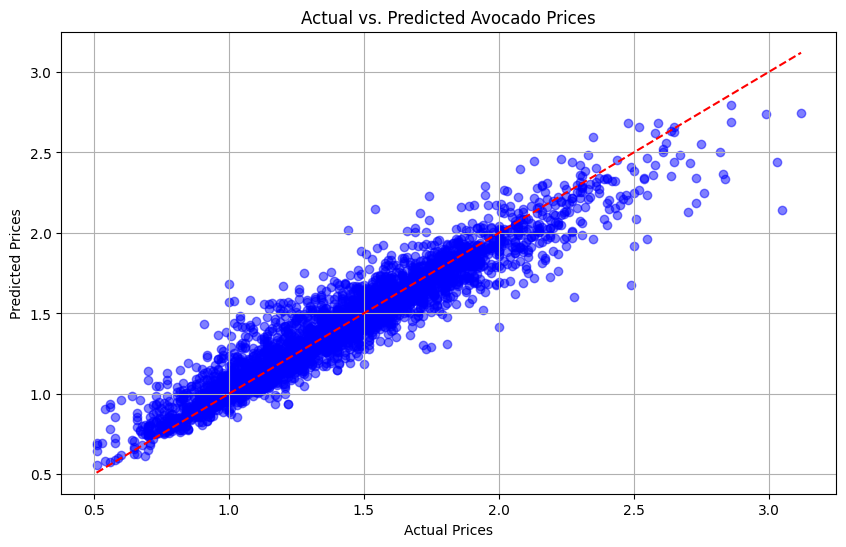

In [69]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Avocado Prices')
plt.grid(True)
plt.show()

As we can see in the graph created, the model demonstrates a strong correlation between predicted and actual prices. Overall, the model is quite accurate for this.


<br>
Visualizations of the feature importances for the data: 

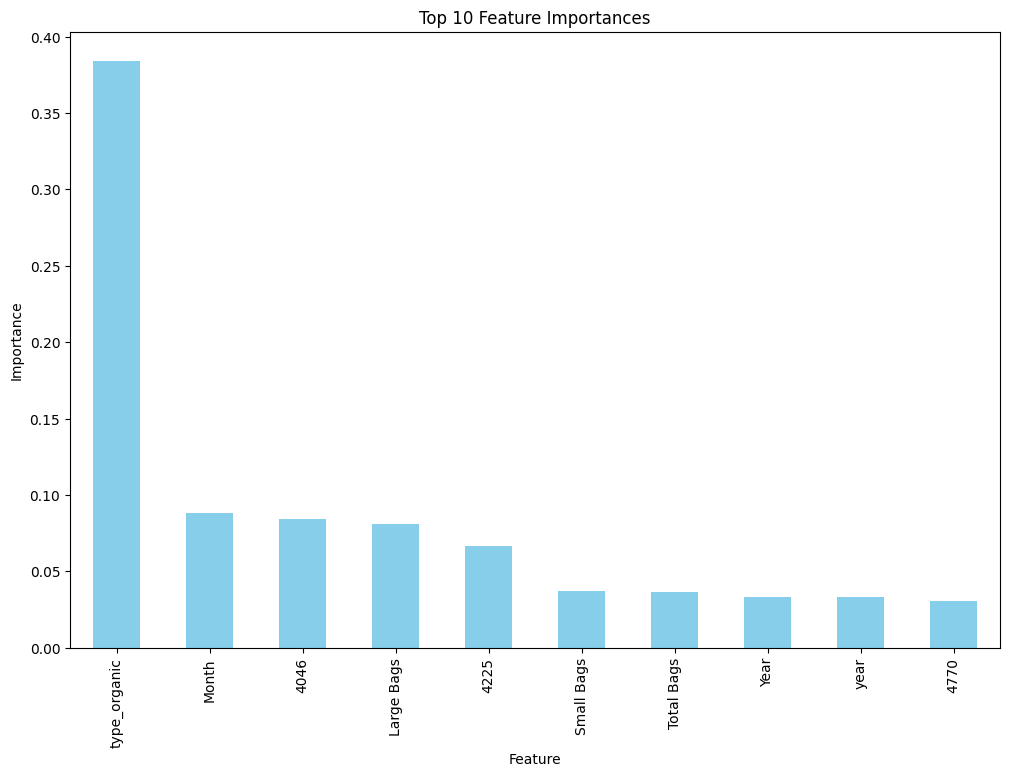

In [70]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(12, 8))
feature_importances.head(min(10, len(feature_importances))).plot(kind='bar', color='skyblue')
plt.title('Top 10 Feature Importances')
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.show()

As displayed by the chart above, the most influential feature in predicting avocado prices is type_organic, significantly outweighing all other features.
Suggesting that whether an avocado is organic or normal is the strongest price determinant, likely due to the price premium on organic produce.

### Price forecasting:

The forecasting is done in another file, from which we will import the forecasting function. 

In [71]:
from forecasting import avocado_forecasting

<br>
Make sure the data is normalized for forecasting using ARIMA, then pass to forecasting function

In [73]:
forecast_data = data[['Date', 'AveragePrice']].copy()  
forecast_data.set_index('Date', inplace=True)  
forecast_data = forecast_data.resample('ME').mean().ffill()

<br>
Import the necessary libraries


In [74]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

<br>
Check the data for correct values

In [75]:
def avocado_forecasting(forecast_data):
    if not isinstance(forecast_data.index, pd.DatetimeIndex):
        raise ValueError("The input data must have a DateTimeIndex.")


    if forecast_data.index.freq is None:
        forecast_data = forecast_data.asfreq('M')  # Monthly default
        print("Frequency was not set. Defaulted to 'M' (monthly).")

<br>
Check the stationarity with the Augmented Dickey-Fuller Test

In [76]:
result = adfuller(forecast_data['AveragePrice'])
print(f"ADF Statistic: {result[0]:.4f}")
print(f"p-value: {result[1]:.4f}")
if result[1] > 0.05:
    print("Warning: The data is non-stationary (p-value > 0.05). Differencing may be required.")

ADF Statistic: -2.9865
p-value: 0.0362


<br>
<br>
Plot the ACF & PACF to determine p and q for ARIMA 

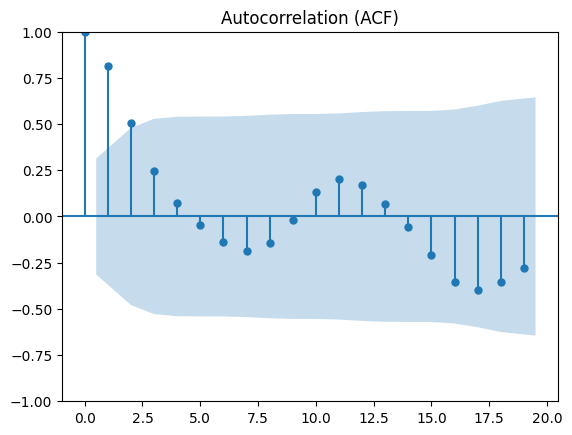

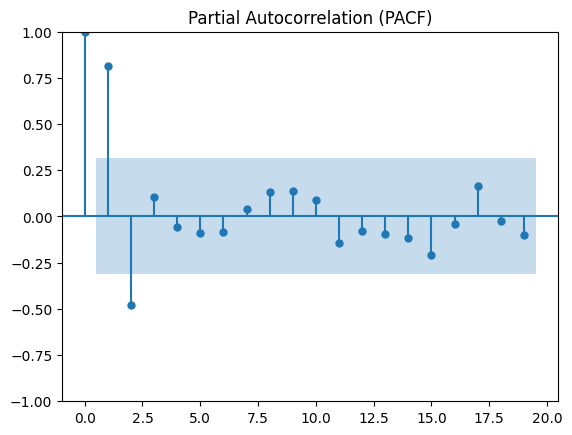

In [ ]:
max_lags = min(40, len(forecast_data) // 2)  
    
plot_acf(forecast_data['AveragePrice'], lags=max_lags)
plt.title("Autocorrelation (ACF)")
plt.show()
    
plot_pacf(forecast_data['AveragePrice'], lags=max_lags)
plt.title("Partial Autocorrelation (PACF)")
plt.show()

<br>
<br>
Fit the ARIMA model and forecast for the next 12 months

In [78]:
model = ARIMA(forecast_data['AveragePrice'], order=(5, 1, 0))  
model_fit = model.fit()
print(model_fit.summary())

forecast = model_fit.forecast(steps=12)
print(forecast)

                               SARIMAX Results                                
Dep. Variable:           AveragePrice   No. Observations:                   39
Model:                 ARIMA(5, 1, 0)   Log Likelihood                  42.368
Date:                Sun, 09 Feb 2025   AIC                            -72.735
Time:                        18:07:13   BIC                            -62.910
Sample:                    01-31-2015   HQIC                           -69.239
                         - 03-31-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3976      0.169      2.353      0.019       0.066       0.729
ar.L2         -0.2370      0.186     -1.271      0.204      -0.603       0.128
ar.L3         -0.1172      0.240     -0.489      0.6

<br>
<br>
Visualize the forecast

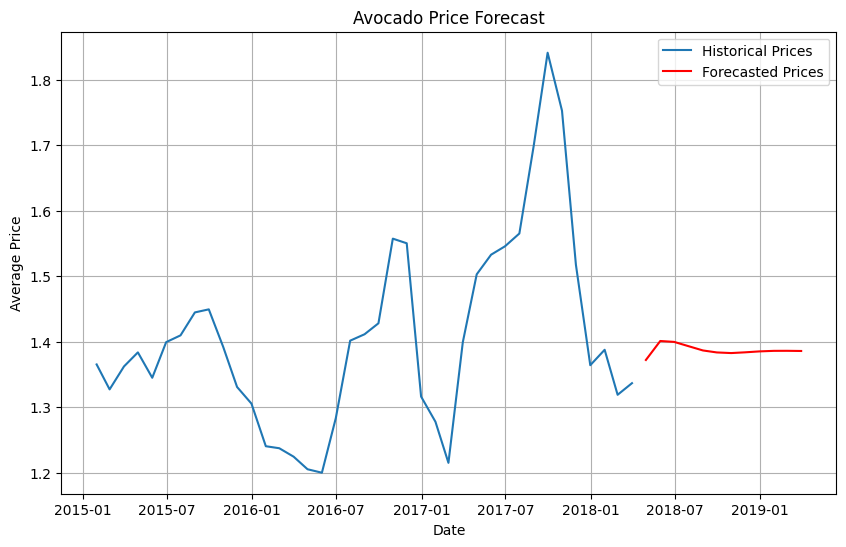

In [80]:
forecast_index = pd.date_range(start=forecast_data.index[-1] + pd.offsets.MonthEnd(), periods=12, freq='ME')
plt.figure(figsize=(10, 6))
plt.plot(forecast_data.index, forecast_data['AveragePrice'], label='Historical Prices')
plt.plot(forecast_index, forecast, label='Forecasted Prices', color='red')
plt.title('Avocado Price Forecast')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.legend()
plt.grid(True)
plt.show()